# Instalação das bibliotecas

In [ ]:
#Importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import pandas as pd
import matplotlib.pyplot as plt #Importar a biblioteca para criação de gráficos

In [ ]:
#Biblioteca em Python que permite manipular planilhas do Excel
pip install openpyxl

# Carregar arquivo

In [ ]:
#Carregar os dados
dados = pd.read_excel('/home/alexei/Downloads/casos-confirmados-de-doencas-de-notificacao-compulsoria.xlsx')
# origem dos dados - https://dados.gov.br/dados/conjuntos-dados/casos-confirmados-de-doencas-de-notificacao-compulsoria

# Análise dos dados

In [ ]:
#Visualizar os dados
dados.head(5)

,geocodigo,município,doenças de notificação compulsória,ano,Quantidades de doenças notificados,fonte
0,2700102,Água Branca,Casos confirmados de doenças de notificação co...,2013,0.0,Secretária de Estado da Saúde - SESAU
1,2700201,Anadia,Casos confirmados de doenças de notificação co...,2013,1.0,Secretária de Estado da Saúde - SESAU
2,2700300,Arapiraca,Casos confirmados de doenças de notificação co...,2013,17.0,Secretária de Estado da Saúde - SESAU
3,2700409,Atalaia,Casos confirmados de doenças de notificação co...,2013,1.0,Secretária de Estado da Saúde - SESAU
4,2700508,Barra de Santo Antônio,Casos confirmados de doenças de notificação co...,2013,3.0,Secretária de Estado da Saúde - SESAU


In [ ]:
#Durante a análise dos dados observei que algumas colunas não respondiam quando chamadas. Para identificar razão optei por mostrar nomes das colunas,
# onde identifiquei que uso de um espaço no começo e no final do nome
dados.columns

Index(['geocodigo', 'município', ' doenças de notificação compulsória', 'ano',
       'Quantidades de doenças notificados ', 'fonte'],
      dtype='object')

In [ ]:
#Altera os nomes das colunas por elas apresentarem espaço excessido, uma no começo outra no final do nome.
dados.rename(columns={' doenças de notificação compulsória': 'doenças de notificação compulsória', 'Quantidades de doenças notificados ': 'Quantidades de doenças notificados'}, inplace=True)

In [ ]:

#Na coluna doenças de notificação o nome da doença notificada vem após o texto: Casos de doenças de ... - retiro o texto inicial deixando somente o nome da doença
dados['doenças de notificação compulsória'] = dados['doenças de notificação compulsória'].str.split('-').str[-1].str.strip()

In [ ]:
#Observar as mudanças realizadas até o momento
dados.head()

,geocodigo,município,doenças de notificação compulsória,ano,Quantidades de doenças notificados,fonte
0,2700102,Água Branca,AIDS,2013,0.0,Secretária de Estado da Saúde - SESAU
1,2700201,Anadia,AIDS,2013,1.0,Secretária de Estado da Saúde - SESAU
2,2700300,Arapiraca,AIDS,2013,17.0,Secretária de Estado da Saúde - SESAU
3,2700409,Atalaia,AIDS,2013,1.0,Secretária de Estado da Saúde - SESAU
4,2700508,Barra de Santo Antônio,AIDS,2013,3.0,Secretária de Estado da Saúde - SESAU


In [ ]:
#Identificar se os tipos de dados estão correntos antes do tratamento deles e se há dados faltantes.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19074 entries, 0 to 19073
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   geocodigo                           19074 non-null  int64  
 1   município                           19074 non-null  object 
 2   doenças de notificação compulsória  19074 non-null  object 
 3   ano                                 19074 non-null  int64  
 4   Quantidades de doenças notificados  18972 non-null  float64
 5   fonte                               19074 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 894.2+ KB


In [ ]:
#Realiza contagem de dados nulos em todas as colunas, póis já obseva-se que na coluna 'Quantidades de doeças notificados' apresenta valores faltantes.
dados.isna().sum()

geocodigo                               0
município                               0
doenças de notificação compulsória      0
ano                                     0
Quantidades de doenças notificados    102
fonte                                   0
dtype: int64

In [ ]:
#Verificar quais linhas contêm valores nulos
linhas_com_nulos = dados[dados.isnull().any(axis=1)]

# Exibir as linhas com valores nulos
linhas_com_nulos

,geocodigo,município,doenças de notificação compulsória,ano,Quantidades de doenças notificados,fonte
9078,2700102,Água Branca,Esquistossomose,2017,NaN,Secretária de Estado da Saúde - SESAU
9079,2700201,Anadia,Esquistossomose,2017,NaN,Secretária de Estado da Saúde - SESAU
9080,2700300,Arapiraca,Esquistossomose,2017,NaN,Secretária de Estado da Saúde - SESAU
9081,2700409,Atalaia,Esquistossomose,2017,NaN,Secretária de Estado da Saúde - SESAU
9082,2700508,Barra de Santo Antônio,Esquistossomose,2017,NaN,Secretária de Estado da Saúde - SESAU
...,...,...,...,...,...,...
9175,2709103,Taquarana,Esquistossomose,2017,NaN,Secretária de Estado da Saúde - SESAU
9176,2709152,Teotônio Vilela,Esquistossomose,2017,NaN,Secretária de Estado da Saúde - SESAU
9177,2709202,Traipu,Esquistossomose,2017,NaN,Secretária de Estado da Saúde - SESAU
9178,2709301,União dos Palmares,Esquistossomose,2017,NaN,Secretária de Estado da Saúde - SESAU


In [ ]:
#Mostra que no ano de 2017, na doença Esquistossomose, não há nenhum caso notificado. Havendo, nesse ano, em todas as cidades, somente valores nulos.
dados[(dados['doenças de notificação compulsória'] == 'Esquistossomose') & (dados['ano'] == 2017) & (dados['Quantidades de doenças notificados'] >= 0)].sum()

geocodigo                             0.0
município                             0.0
doenças de notificação compulsória    0.0
ano                                   0.0
Quantidades de doenças notificados    0.0
fonte                                 0.0
dtype: float64

In [ ]:
#Mostra em qual ano e doença há valores nulos. Objetivo observar se alem do ano de 2017 outros anos possuem valores nulos e em outra doença alem da Esquistossomose
print(f'É observado valores nulos somente no ano de {linhas_com_nulos["ano"].unique()}')
print(f'É observado valores nulos somente na doenças de notificação compulsória: {linhas_com_nulos["doenças de notificação compulsória"].unique()}')

É observado valores nulos somente no ano de [2017]
É observado valores nulos somente na doenças de notificação compulsória: ['Esquistossomose']


In [ ]:
#Mostra se há valores duplocados
dados.duplicated().sum()

0

# Pré-processamento

In [ ]:
#Elimina as linhas com valor nulo
dados.dropna(subset=['Quantidades de doenças notificados'],axis=0,how='any',inplace=True)

In [ ]:
dados = dados.drop('geocodigo',axis=1) # Excluir a coluna 'geocodigo', pois, a partir desse momento, não exerce nunhuma função.
dados = dados.drop('fonte',axis=1) # Excluir a coluna 'fonte', pois, a partir desse momento, não exerce nunhuma função.

In [ ]:
dados.head(5)

,município,doenças de notificação compulsória,ano,Quantidades de doenças notificados
0,Água Branca,AIDS,2013,0.0
1,Anadia,AIDS,2013,1.0
2,Arapiraca,AIDS,2013,17.0
3,Atalaia,AIDS,2013,1.0
4,Barra de Santo Antônio,AIDS,2013,3.0


# Análise dos dados

- Doenças mais notificadas

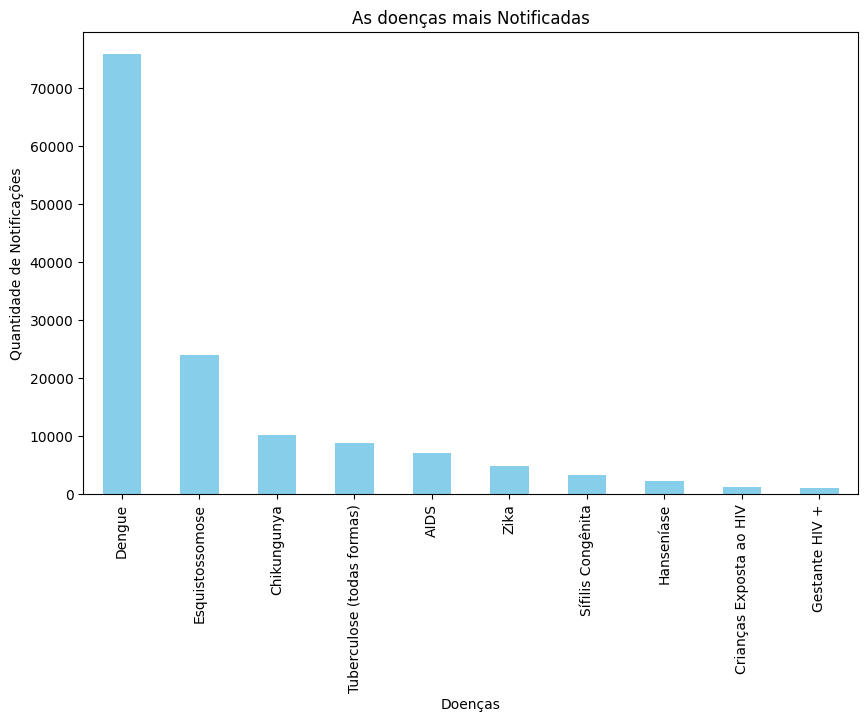

In [ ]:
# Agrupe os dados pela doença e calcule a quantidade total de notificações para uma
doencas_notificadas = dados.groupby('doenças de notificação compulsória')['Quantidades de doenças notificados'].sum()

# Ordene as doenças com base na quantidade de notificações
doencas_notificadas = doencas_notificadas.sort_values(ascending=False)

# Visualizar apenas as 10 mais notificadas
top_10_doencas = doencas_notificadas.head(10)

# Crie um gráfico de barras para visualizar as doenças mais notificadas
plt.figure(figsize=(10, 6))
top_10_doencas.plot(kind='bar', color='skyblue')
plt.title('As doenças mais Notificadas')
plt.xlabel('Doenças')
plt.ylabel('Quantidade de Notificações')
plt.xticks(rotation=90)
plt.show()

- Anos com mais notificações

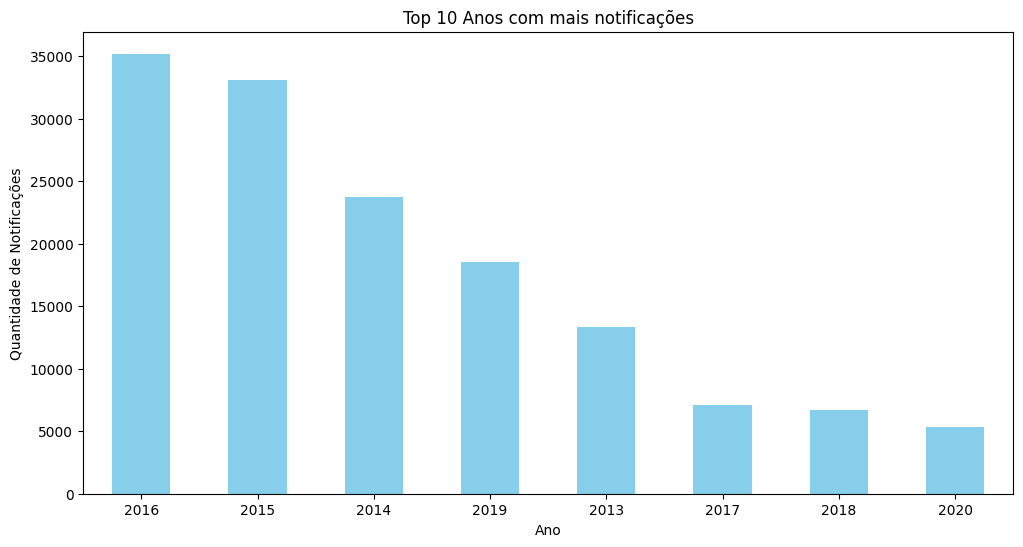

In [ ]:
# Agrupe os dados pelo ano e calcule a quantidade total de notificações
ano_notificadas = dados.groupby('ano')['Quantidades de doenças notificados'].sum()

# Ordene as doenças com base na quantidade de notificações
ano_notificadas = ano_notificadas.sort_values(ascending=False)

# Visualizar apenas as top 10 anos com mais notificadas
top_10_ano = ano_notificadas.head(10)

# Crie um gráfico de barras para visualizar os anos mais notificados
plt.figure(figsize=(12, 6))
top_10_ano.plot(kind='bar', color='skyblue')
plt.title('Top 10 Anos com mais notificações')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Notificações')
plt.xticks(rotation=0)
plt.show()

Observou-se que três das principais doenças transmitidas são pelo vetor Aedes Aegypti e estão entre as 6 doenças mais notificadas.
Opto por analisar mais profundamente essas incidência.  

In [ ]:
# Cria um novo dataframe com 3 das doenças transmissiveis pelo mesmo vetor o mosquido Aedes aegypti
aedes = ['Dengue', 'Chikungunya', 'Zika']
aedes = dados.loc[dados['doenças de notificação compulsória'].isin(aedes)]
aedes.head(5)

,município,doenças de notificação compulsória,ano,Quantidades de doenças notificados
204,Água Branca,Dengue,2013,1.0
205,Anadia,Dengue,2013,3.0
206,Arapiraca,Dengue,2013,3692.0
207,Atalaia,Dengue,2013,14.0
208,Barra de Santo Antônio,Dengue,2013,1.0


- Variação de número de casos de Dengue, Chikungunya e Zika dentro dos anos da amostra

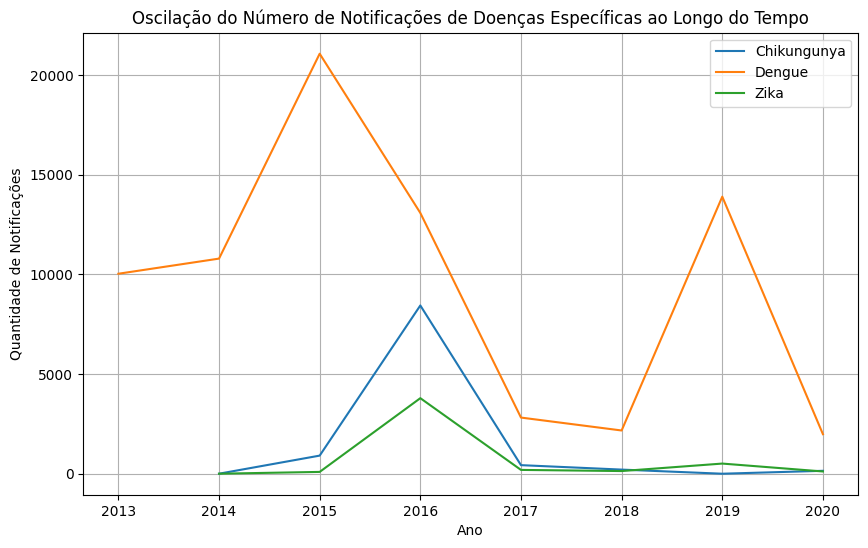

In [ ]:
# Agrupar os dados por ano e doença e calcular a quantidade total de notificações para cada ano
dados_agrupados = aedes.groupby(['ano', 'doenças de notificação compulsória'])['Quantidades de doenças notificados'].sum().unstack()

# Criar um gráfico de linha
plt.figure(figsize=(10, 6))

# Plotar as linhas para cada doença
for doenca in dados_agrupados.columns:
    plt.plot(dados_agrupados.index, dados_agrupados[doenca], label=doenca)

# Adicionar legendas e rótulos
plt.title('Oscilação do Número de Notificações de Doenças Específicas ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Notificações')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()

- Cinco cidades que mais notificaram

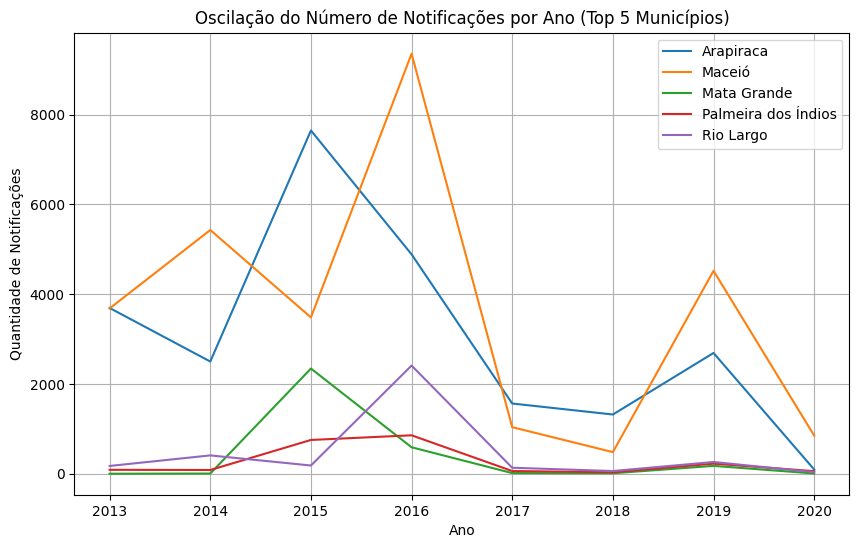

In [ ]:
# Agrupar os dados por município e calcular a soma da quantidade de casos notificados para cada município
casos_por_municipio = aedes.groupby('município')['Quantidades de doenças notificados'].sum()

# Obter os 5 municípios que mais notificam
top_5_municipios = casos_por_municipio.nlargest(5)

# Selecionar apenas as linhas do DataFrame original correspondentes aos 5 municípios que mais notificam
df_top_5_municipios = aedes[aedes['município'].isin(top_5_municipios.index)]

# Agrupar os dados do DataFrame dos 5 municípios por ano e calcular a soma da quantidade de casos notificados para cada ano
casos_por_ano_municipio = df_top_5_municipios.groupby(['ano', 'município'])['Quantidades de doenças notificados'].sum().unstack()

# Criar um gráfico de linhas para a oscilação do número de notificações por ano para os 5 municípios
plt.figure(figsize=(10, 6))
for municipio in casos_por_ano_municipio.columns:
    plt.plot(casos_por_ano_municipio.index, casos_por_ano_municipio[municipio], label=municipio)

plt.title('Oscilação do Número de Notificações por Ano (Top 5 Municípios)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Notificações')
plt.legend()
plt.grid(True)
plt.show()

Possiveis problemas de negócio resolvidos:
- Quais doenças mais notificadas
- Quais anos mais houveram notificação
- Oscilação das das doenças mais notificadas durante os anos da amostra
- Quais municípios mais notificaram
- Oscilação das doenças notificadas pelos municípios que mais notificaram dentro dos anos da amostra